In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

id	Unique ID for the customer
Gender	Gender of the customer
Age:	Age of the customer
Driving_License	0 : Customer does not have DL, 1 : Customer already has DL
Region_Code	Unique code for the region of the customer
Previously_Insured	1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance
Vehicle_Age	Age of the Vehicle
Vehicle_Damage	1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.
Annual_Premium:	The amount customer needs to pay as premium in the year
PolicySalesChannel	:Anonymised Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.
Vintage:	Number of Days, Customer has been associated with the company

In [2]:
df=pd.read_csv('train.csv')

In [3]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [5]:
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [6]:
df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

No Null Values

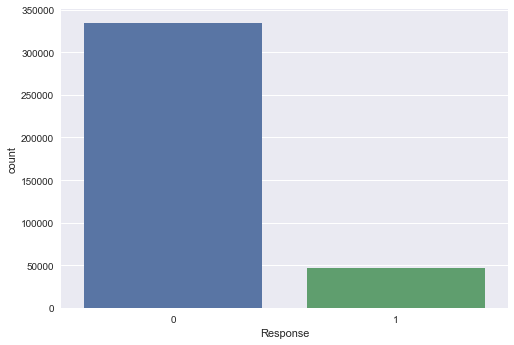

In [7]:
sns.countplot(df.Response)

Looks like very few people are interested.

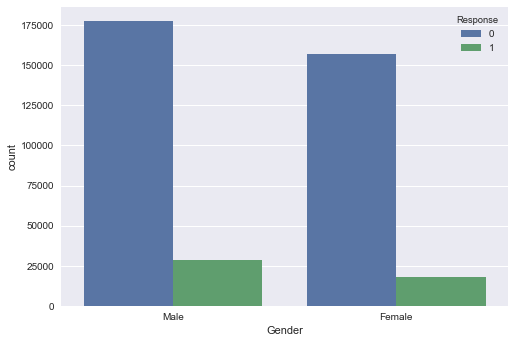

In [8]:
sns.countplot(df.Gender,hue=df.Response)

Interested/Not Interested Ratio is almost equal for both Males and Females 

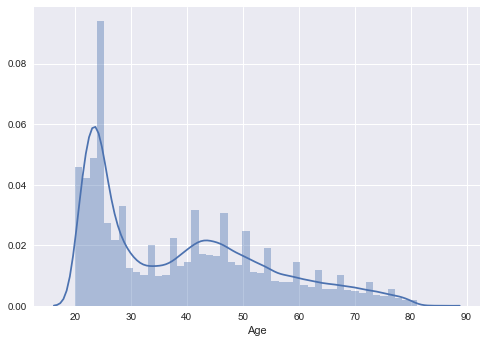

In [9]:
sns.distplot(df.Age)

In [10]:
df['age_group']=pd.cut(df.Age,bins = [18,29,55,90],labels=['Young','Middle','Senior'])

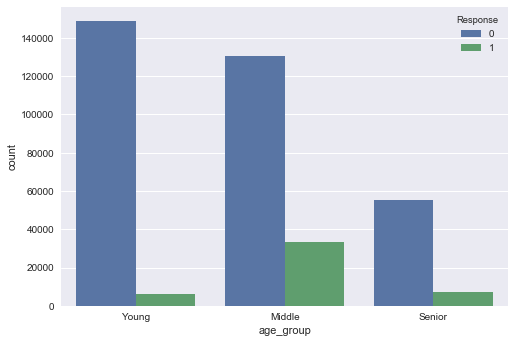

In [11]:
sns.countplot(df.age_group,hue=df.Response)

It can be seen that the middle age group(29-55) are the most interested reason being they are more financially stable and can afford insurance.

Skewed

In [12]:
df.Driving_License.value_counts()

1    380297
0       812
Name: Driving_License, dtype: int64

I will drop Driving License column as it does not make sense to include people who do not have a DL.Moreover, the number of people who don't have a DL and have purchased the Policy count to 41.

In [13]:
df=df.drop('Driving_License',axis=1)

In [14]:
df.Region_Code.unique()

array([28.,  3., 11., 41., 33.,  6., 35., 50., 15., 45.,  8., 36., 30.,
       26., 16., 47., 48., 19., 39., 23., 37.,  5., 17.,  2.,  7., 29.,
       46., 27., 25., 13., 18., 20., 49., 22., 44.,  0.,  9., 31., 12.,
       34., 21., 10., 14., 38., 24., 40., 43., 32.,  4., 51., 42.,  1.,
       52.])

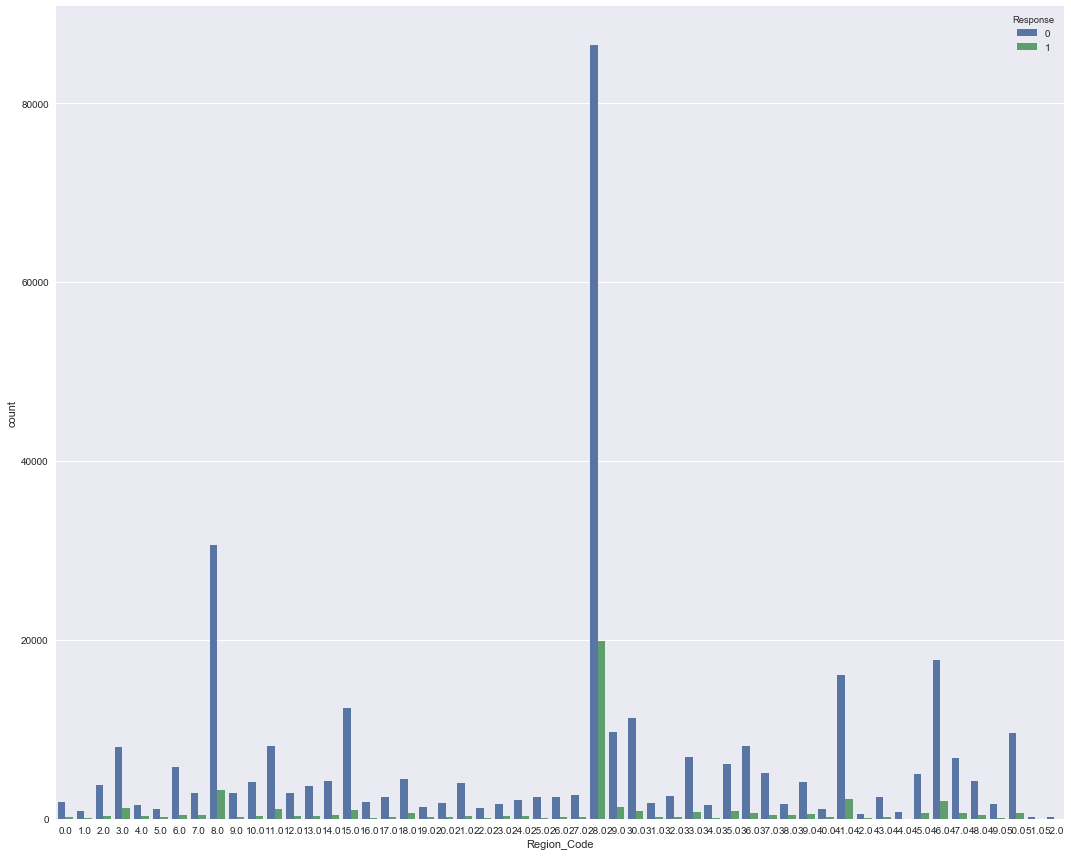

In [15]:
plt.figure(figsize=(15,12))
sns.countplot(df.Region_Code,hue=df.Response)
plt.tight_layout()

mostly concentrated to Region code 0.28

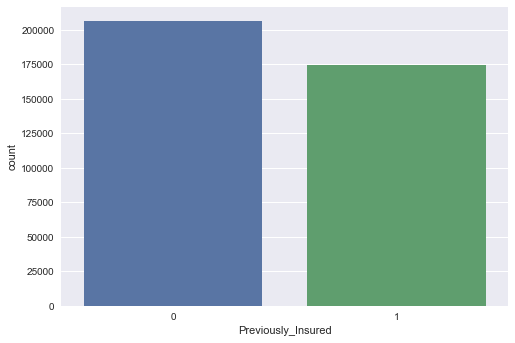

In [16]:
sns.countplot(df.Previously_Insured)

In [17]:
df.Vehicle_Age=df.Vehicle_Age.astype('category')

In [18]:
df.Vehicle_Age

0         > 2 Years
1          1-2 Year
2         > 2 Years
3          < 1 Year
4          < 1 Year
            ...    
381104     1-2 Year
381105     < 1 Year
381106     < 1 Year
381107    > 2 Years
381108     1-2 Year
Name: Vehicle_Age, Length: 381109, dtype: category
Categories (3, object): [1-2 Year, < 1 Year, > 2 Years]

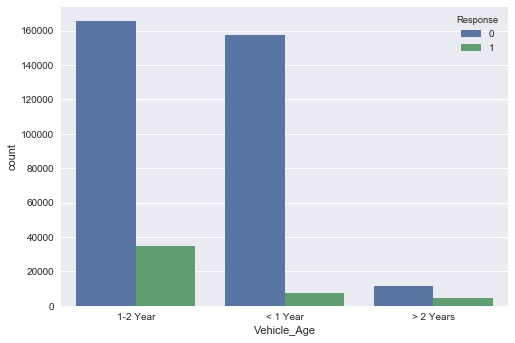

In [19]:
sns.countplot(df.Vehicle_Age,hue=df.Response)

Looking at the proportion, Owners who havent bought any policy within 2 years are more likely to buy

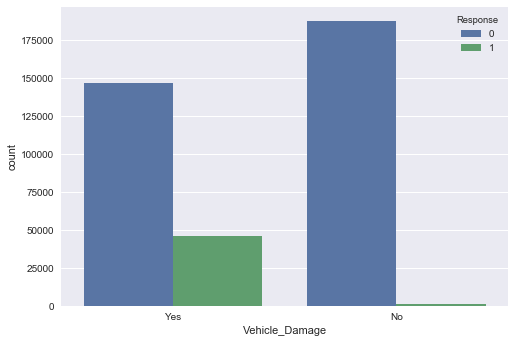

In [20]:
sns.countplot(df.Vehicle_Damage,hue=df.Response)

Customers who have an accidental history are more likely to buy insurance

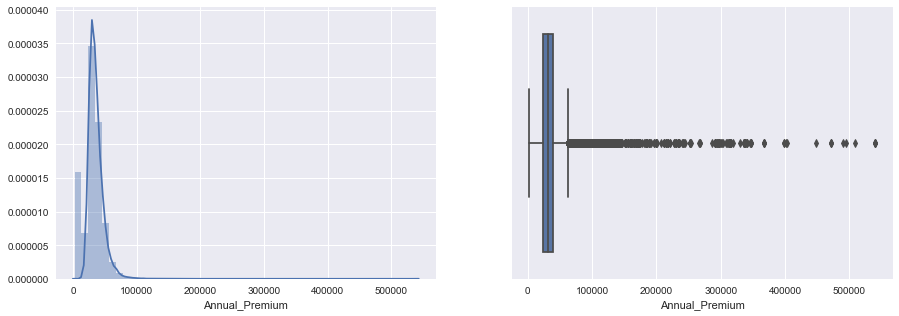

In [21]:
fig,(ax1,ax2)=plt.subplots(1,2,sharex=False,sharey=False,figsize=(15,5))
sns.distplot(df.Annual_Premium,ax=ax1)
sns.boxplot(df.Annual_Premium,ax=ax2)

REMOVING EXTREME OUTLIERS

In [22]:
df.Annual_Premium.describe()

count    381109.000000
mean      30564.389581
std       17213.155057
min        2630.000000
25%       24405.000000
50%       31669.000000
75%       39400.000000
max      540165.000000
Name: Annual_Premium, dtype: float64

In [23]:
IQR = df.Annual_Premium.quantile(0.75) - df.Annual_Premium.quantile(0.25)

Lower_fence = df.Annual_Premium.quantile(0.25) - (IQR * 1.5)
Upper_fence = df.Annual_Premium.quantile(0.75) + (IQR * 1.5)

Upper_fence, Lower_fence, IQR

(61892.5, 1912.5, 14995.0)

In [24]:
df=df.loc[(df.Annual_Premium>=12805.0) & (df.Annual_Premium<=57000)]

In [25]:
df=df.reset_index()

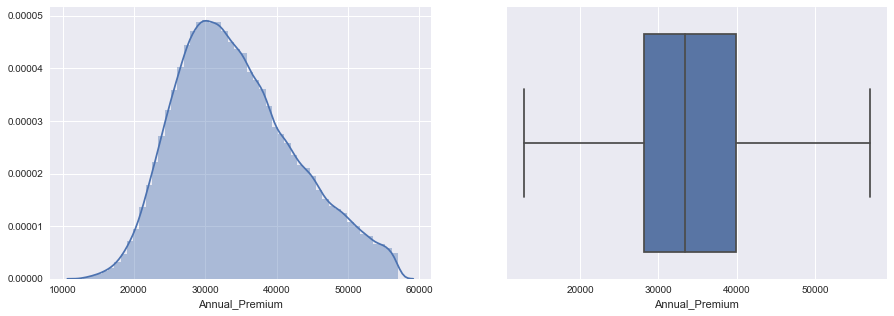

In [26]:
fig,(ax1,ax2)=plt.subplots(1,2,sharex=False,sharey=False,figsize=(15,5))
sns.distplot(df.Annual_Premium,ax=ax1)
sns.boxplot(df.Annual_Premium,ax=ax2)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300041 entries, 0 to 300040
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   index                 300041 non-null  int64   
 1   id                    300041 non-null  int64   
 2   Gender                300041 non-null  object  
 3   Age                   300041 non-null  int64   
 4   Region_Code           300041 non-null  float64 
 5   Previously_Insured    300041 non-null  int64   
 6   Vehicle_Age           300041 non-null  category
 7   Vehicle_Damage        300041 non-null  object  
 8   Annual_Premium        300041 non-null  float64 
 9   Policy_Sales_Channel  300041 non-null  float64 
 10  Vintage               300041 non-null  int64   
 11  Response              300041 non-null  int64   
 12  age_group             300041 non-null  category
dtypes: category(2), float64(3), int64(6), object(2)
memory usage: 25.8+ MB


In [28]:
df.Policy_Sales_Channel.nunique()

146

In [29]:
df.Region_Code.unique()

array([28.,  3., 11., 41.,  6., 35., 50., 15., 45., 33.,  8., 36., 30.,
       26., 16., 47., 19., 39., 23., 37.,  5., 17.,  2., 29., 46., 27.,
       13., 18., 25., 49., 22., 44.,  9., 12., 34., 21., 10., 14., 38.,
       40., 43.,  4.,  7., 32., 24., 42., 48., 52., 51., 20.,  0.,  1.,
       31.])

In [30]:
df.Region_Code.value_counts().sort_values(ascending=False).head(10)

28.0    86185
8.0     27159
46.0    16740
41.0    15568
15.0    10971
30.0    10204
50.0     8919
29.0     8789
11.0     7582
3.0      7183
Name: Region_Code, dtype: int64

In [31]:
top_10 = [x for x in df.Region_Code.value_counts().sort_values(ascending=False).head(10).index]
top_10

[28.0, 8.0, 46.0, 41.0, 15.0, 30.0, 50.0, 29.0, 11.0, 3.0]

In [32]:
import numpy as np
for label in top_10:
    df[label] = np.where(df['Region_Code']==label, 1, 0)

df[['Region_Code']+top_10].head(10)

,Region_Code,28.0,8.0,46.0,41.0,15.0,30.0,50.0,29.0,11.0,3.0
0,28.0,1,0,0,0,0,0,0,0,0,0
1,3.0,0,0,0,0,0,0,0,0,0,1
2,28.0,1,0,0,0,0,0,0,0,0,0
3,11.0,0,0,0,0,0,0,0,0,1,0
4,41.0,0,0,0,1,0,0,0,0,0,0
5,11.0,0,0,0,0,0,0,0,0,1,0
6,28.0,1,0,0,0,0,0,0,0,0,0
7,3.0,0,0,0,0,0,0,0,0,0,1
8,6.0,0,0,0,0,0,0,0,0,0,0
9,35.0,0,0,0,0,0,0,0,0,0,0


In [33]:
df.head()

,index,id,Gender,Age,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,...,28.0,8.0,46.0,41.0,15.0,30.0,50.0,29.0,11.0,3.0
0,0,1,Male,44,28.0,0,> 2 Years,Yes,40454.0,26.0,...,1,0,0,0,0,0,0,0,0,0
1,1,2,Male,76,3.0,0,1-2 Year,No,33536.0,26.0,...,0,0,0,0,0,0,0,0,0,1
2,2,3,Male,47,28.0,0,> 2 Years,Yes,38294.0,26.0,...,1,0,0,0,0,0,0,0,0,0
3,3,4,Male,21,11.0,1,< 1 Year,No,28619.0,152.0,...,0,0,0,0,0,0,0,0,1,0
4,4,5,Female,29,41.0,1,< 1 Year,No,27496.0,152.0,...,0,0,0,1,0,0,0,0,0,0


In [34]:
df.columns

Index([               'index',                   'id',               'Gender',
                        'Age',          'Region_Code',   'Previously_Insured',
                'Vehicle_Age',       'Vehicle_Damage',       'Annual_Premium',
       'Policy_Sales_Channel',              'Vintage',             'Response',
                  'age_group',                   28.0,                    8.0,
                         46.0,                   41.0,                   15.0,
                         30.0,                   50.0,                   29.0,
                         11.0,                    3.0],
      dtype='object')

In [35]:
df_cat=pd.get_dummies(df[['Vehicle_Age','Vehicle_Damage','age_group','Gender']],drop_first=True)

In [36]:
df=pd.concat([df,df_cat],axis=1)

In [37]:
df=df.drop(['id','Gender','Vehicle_Age','Vehicle_Damage','Age','Region_Code','Policy_Sales_Channel'],axis=1)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300041 entries, 0 to 300040
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype   
---  ------                 --------------   -----   
 0   index                  300041 non-null  int64   
 1   Previously_Insured     300041 non-null  int64   
 2   Annual_Premium         300041 non-null  float64 
 3   Vintage                300041 non-null  int64   
 4   Response               300041 non-null  int64   
 5   age_group              300041 non-null  category
 6   28.0                   300041 non-null  int64   
 7   8.0                    300041 non-null  int64   
 8   46.0                   300041 non-null  int64   
 9   41.0                   300041 non-null  int64   
 10  15.0                   300041 non-null  int64   
 11  30.0                   300041 non-null  int64   
 12  50.0                   300041 non-null  int64   
 13  29.0                   300041 non-null  int64   
 14  11.0                

In [39]:
df.head()

,index,Previously_Insured,Annual_Premium,Vintage,Response,age_group,28.0,8.0,46.0,41.0,...,50.0,29.0,11.0,3.0,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes,age_group_Middle,age_group_Senior,Gender_Male
0,0,0,40454.0,217,1,Middle,1,0,0,0,...,0,0,0,0,0,1,1,1,0,1
1,1,0,33536.0,183,0,Senior,0,0,0,0,...,0,0,0,1,0,0,0,0,1,1
2,2,0,38294.0,27,1,Middle,1,0,0,0,...,0,0,0,0,0,1,1,1,0,1
3,3,1,28619.0,203,0,Young,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
4,4,1,27496.0,39,0,Young,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0


In [40]:
df=df.drop('index',axis=1)

In [41]:
from sklearn.preprocessing import StandardScaler

In [42]:
scale=StandardScaler()

In [43]:
df.columns

Index([   'Previously_Insured',        'Annual_Premium',
                     'Vintage',              'Response',
                   'age_group',                    28.0,
                           8.0,                    46.0,
                          41.0,                    15.0,
                          30.0,                    50.0,
                          29.0,                    11.0,
                           3.0,  'Vehicle_Age_< 1 Year',
       'Vehicle_Age_> 2 Years',    'Vehicle_Damage_Yes',
            'age_group_Middle',      'age_group_Senior',
                 'Gender_Male'],
      dtype='object')

In [44]:
scaled=pd.DataFrame(scale.fit_transform(df[['Annual_Premium','Vintage']]),columns=df.columns[1:3])

In [45]:
scaled

,Annual_Premium,Vintage
0,0.713172,0.749851
1,-0.108449,0.343490
2,0.456638,-1.520992
3,-0.692420,0.582526
4,-0.825793,-1.377570
...,...,...
300036,-0.508214,-0.791932
300037,0.661153,-0.278004
300038,0.079439,0.080550
300039,1.207594,-0.959257


In [46]:
df=df.drop(['Annual_Premium','Vintage'],axis=1)

In [47]:
df=pd.concat([df,scaled],axis=1)

In [48]:
df

,Previously_Insured,Response,age_group,28.0,8.0,46.0,41.0,15.0,30.0,50.0,...,11.0,3.0,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes,age_group_Middle,age_group_Senior,Gender_Male,Annual_Premium,Vintage
0,0,1,Middle,1,0,0,0,0,0,0,...,0,0,0,1,1,1,0,1,0.713172,0.749851
1,0,0,Senior,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,1,-0.108449,0.343490
2,0,1,Middle,1,0,0,0,0,0,0,...,0,0,0,1,1,1,0,1,0.456638,-1.520992
3,1,0,Young,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,1,-0.692420,0.582526
4,1,0,Young,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,-0.825793,-1.377570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300036,1,0,Senior,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,-0.508214,-0.791932
300037,1,0,Middle,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,1,0.661153,-0.278004
300038,1,0,Young,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0.079439,0.080550
300039,0,0,Senior,0,0,0,0,0,0,0,...,0,0,0,1,1,0,1,0,1.207594,-0.959257


In [49]:
df=df.drop('age_group',axis=1)

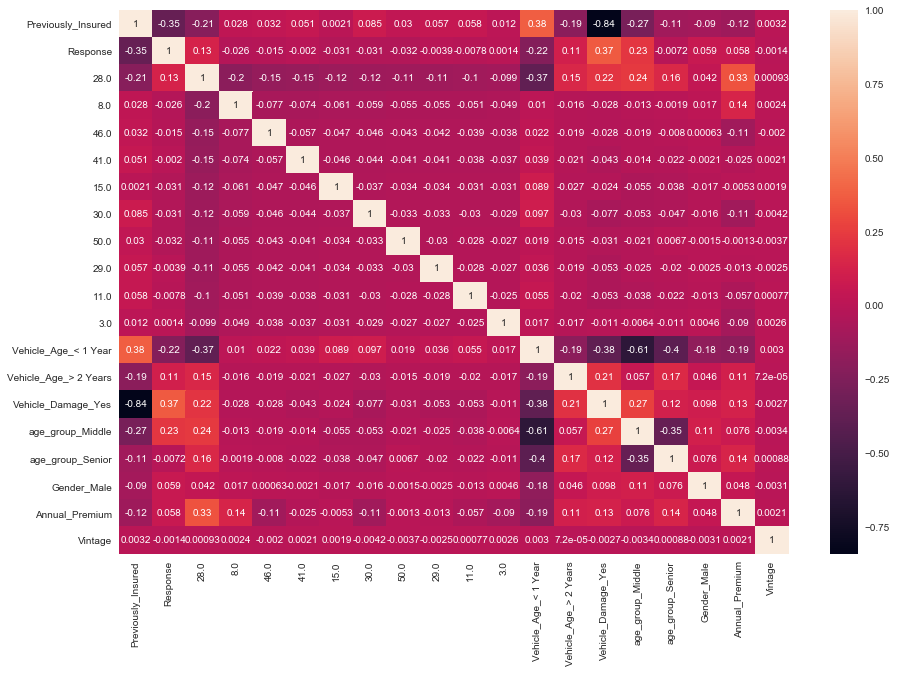

In [50]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)

In [51]:
df.columns

Index([   'Previously_Insured',              'Response',
                          28.0,                     8.0,
                          46.0,                    41.0,
                          15.0,                    30.0,
                          50.0,                    29.0,
                          11.0,                     3.0,
        'Vehicle_Age_< 1 Year', 'Vehicle_Age_> 2 Years',
          'Vehicle_Damage_Yes',      'age_group_Middle',
            'age_group_Senior',           'Gender_Male',
              'Annual_Premium',               'Vintage'],
      dtype='object')

In [52]:
df.head()

,Previously_Insured,Response,28.0,8.0,46.0,41.0,15.0,30.0,50.0,29.0,11.0,3.0,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes,age_group_Middle,age_group_Senior,Gender_Male,Annual_Premium,Vintage
0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0.713172,0.749851
1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,-0.108449,0.343490
2,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0.456638,-1.520992
3,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,-0.692420,0.582526
4,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,-0.825793,-1.377570


In [53]:
X=df.drop(['Response',8.0,46.0,41.0,15.0,30.0,29.0,50.0,11.0,3.0,'Vintage','age_group_Senior','Annual_Premium','Gender_Male'],axis=1)
y=df['Response']

In [54]:
X.head()

,Previously_Insured,28.0,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes,age_group_Middle
0,0,1,0,1,1,1
1,0,0,0,0,0,0
2,0,1,0,1,1,1
3,1,0,1,0,0,0
4,1,0,1,0,0,0


In [55]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [56]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(np.array(X),i) for i in range(np.array(X).shape[1])]
vif["Features"] = X.columns

In [57]:
vif

,vif,Features
0,2.843860,Previously_Insured
1,1.576035,28
2,2.687613,Vehicle_Age_< 1 Year
3,1.112760,Vehicle_Age_> 2 Years
4,2.658508,Vehicle_Damage_Yes
5,2.248259,age_group_Middle


In [58]:
X.rename(columns={28.0:'Region_Code_28'},inplace=True)

In [59]:
X.rename(columns={'Vehicle_Age_< 1 Year':'Veh_Age_less_1','Vehicle_Age_> 2 Years':'Veh_age_more_2'},inplace=True)

In [60]:
X.head()

,Previously_Insured,Region_Code_28,Veh_Age_less_1,Veh_age_more_2,Vehicle_Damage_Yes,age_group_Middle
0,0,1,0,1,1,1
1,0,0,0,0,0,0
2,0,1,0,1,1,1
3,1,0,1,0,0,0
4,1,0,1,0,0,0


In [86]:
from sklearn.model_selection import train_test_split

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=333)

OVERSAMPLING TRAINING SET

In [88]:
from imblearn.over_sampling import SMOTE

In [89]:
sm = SMOTE(sampling_strategy=0.5,random_state=12)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)


# LOGISTIC

In [90]:
from sklearn.linear_model import LogisticRegression

In [91]:
clf = LogisticRegression(penalty='l1',solver='liblinear').fit(X_train_res, y_train_res)

In [92]:
log_pred=clf.predict(X_test)

In [93]:
from sklearn.metrics import classification_report,confusion_matrix,f1_score

In [94]:
print(classification_report(y_test,log_pred))
print(confusion_matrix(y_test,log_pred))

              precision    recall  f1-score   support

           0       0.96      0.79      0.87     87287
           1       0.32      0.73      0.45     11727

    accuracy                           0.79     99014
   macro avg       0.64      0.76      0.66     99014
weighted avg       0.88      0.79      0.82     99014

[[69323 17964]
 [ 3118  8609]]


In [135]:
from sklearn.metrics import roc_auc_score,roc_curve,auc

In [136]:
auc = roc_auc_score(y_test, log_pred)
auc

0.7641570026026464

In [137]:
fpr, tpr, thresholds = roc_curve(y_test, log_pred)

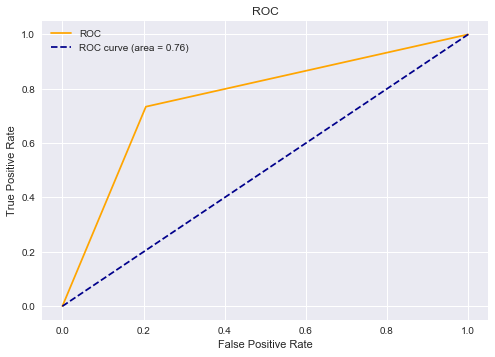

In [139]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend()
plt.show()

# RANDOM FOREST

In [100]:
from sklearn.ensemble import RandomForestClassifier

In [101]:
RF=RandomForestClassifier()

In [102]:
RF.fit(X_train_res,y_train_res)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [103]:
RF_pred=RF.predict(X_test)

In [104]:
print(classification_report(y_test,RF_pred))
print(confusion_matrix(y_test,RF_pred))

              precision    recall  f1-score   support

           0       0.96      0.78      0.86     87287
           1       0.32      0.77      0.45     11727

    accuracy                           0.78     99014
   macro avg       0.64      0.77      0.65     99014
weighted avg       0.89      0.78      0.81     99014

[[67847 19440]
 [ 2723  9004]]


In [105]:
f1_score(y_test,RF_pred)

0.44828358766274184

In [106]:
from sklearn.model_selection import RandomizedSearchCV
parameters = {'n_estimators':[300,400,500],
    'max_depth':[1,2,3,4,5], 
              'min_samples_leaf':[1,2,3,4,5], 
              'min_samples_split':[2,3,4,5],
              'criterion' : ['gini','entropy']}

In [107]:
rf=RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=parameters,n_iter=10,cv=3,verbose=2,
                               random_state=300,n_jobs=-1)
rf_randomcv.fit(X_train_res,y_train_res)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  5.1min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [108]:
rf_randomcv.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [109]:
rf_randomcv.best_params_

{'n_estimators': 400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_depth': 5,
 'criterion': 'entropy'}

In [110]:
RF=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [111]:
RF.fit(X_train_res,y_train_res)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [112]:
RF_pred_grid=RF.predict(X_test)

In [113]:
print(classification_report(y_test,RF_pred_grid))
print(confusion_matrix(y_test,RF_pred_grid))

              precision    recall  f1-score   support

           0       0.96      0.78      0.86     87287
           1       0.32      0.77      0.45     11727

    accuracy                           0.78     99014
   macro avg       0.64      0.77      0.65     99014
weighted avg       0.89      0.78      0.81     99014

[[67847 19440]
 [ 2723  9004]]


In [140]:
auc = roc_auc_score(y_test,RF_pred_grid)
auc

0.7725436122593045

In [141]:
fpr, tpr, thresholds = roc_curve(y_test, RF_pred_grid)

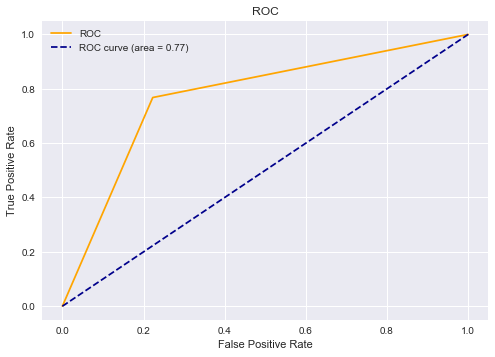

In [142]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend()
plt.show()

# XG BOOST

In [117]:
import xgboost as xgb
from xgboost import XGBClassifier

In [118]:
xg=XGBClassifier()

In [119]:
X_train.columns

Index(['Previously_Insured', 'Region_Code_28', 'Veh_Age_less_1',
       'Veh_age_more_2', 'Vehicle_Damage_Yes', 'age_group_Middle'],
      dtype='object')

In [120]:
xg.fit(X_train_res,y_train_res)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [121]:
xg_pred=xg.predict(X_test)

In [122]:
print(classification_report(y_test,xg_pred))
print(confusion_matrix(y_test,xg_pred))


              precision    recall  f1-score   support

           0       0.96      0.79      0.87     87287
           1       0.32      0.75      0.45     11727

    accuracy                           0.78     99014
   macro avg       0.64      0.77      0.66     99014
weighted avg       0.88      0.78      0.82     99014

[[68827 18460]
 [ 2975  8752]]


In [123]:
param_grid={
   
    ' learning_rate':[1,0.1,0.01,0.001],
    'max_depth': [2,3,5,8,10],
    'n_estimators':[200,300,400,500]
    
}

In [124]:
xg=XGBClassifier()
xg_cv=RandomizedSearchCV(estimator=xg,param_distributions=param_grid,n_iter=10,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
xg_cv.fit(X_train_res,y_train_res)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  8.3min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, scale_pos_weight=1,
                                           seed=None, silent=None, subsample=1,
                                           verbosity=1),
                   iid='de

In [125]:
xg_cv.best_params_

{'n_estimators': 300, 'max_depth': 3, ' learning_rate': 0.1}

In [126]:
xg_cv.best_estimator_

XGBClassifier( learning_rate=0.1, base_score=0.5, booster='gbtree',
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=300, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [127]:
xg_new=XGBClassifier(base_score=0.5, booster='gbtree',
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=300, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [128]:
xg_new.fit(X_train_res,y_train_res)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=300, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [129]:
xg_preds=xg_new.predict(X_test)

In [130]:
print(classification_report(y_test,xg_preds))
print(confusion_matrix(y_test,xg_preds))

              precision    recall  f1-score   support

           0       0.96      0.78      0.86     87287
           1       0.32      0.77      0.45     11727

    accuracy                           0.78     99014
   macro avg       0.64      0.77      0.65     99014
weighted avg       0.89      0.78      0.81     99014

[[67847 19440]
 [ 2723  9004]]


In [143]:
auc = roc_auc_score(y_test,xg_preds)
auc

0.7725436122593045

In [144]:
fpr, tpr, thresholds = roc_curve(y_test,xg_preds)

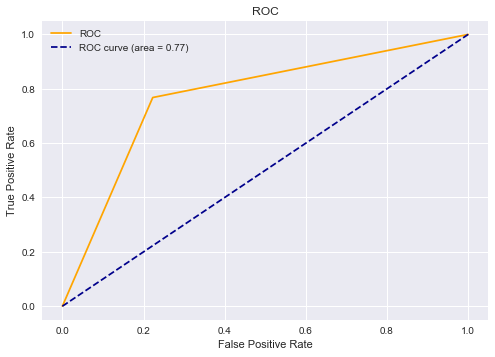

In [146]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend()
plt.show()

XG boost gave the highest AUC and TPR, but still low on F1 score
WORK IN PROGRESS!!!